In [2]:
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from IPython.display import display, HTML

from matplotlib import pyplot as plt
import tifffile as tiff
import numpy as np
import cv2

In [3]:
path_pref = "C:/Users/mikho/Desktop/Vision par ordinateur/"

img_name_grainsblancs = path_pref + "ImagesDeTravail/grainsblancs.TIF"
img_name_students = 'grayscale-photo-of-students.jpg'

# 3.1 Segmentation

## Kmeans

Visualisation of how different values of 'k' affect the image segmentation. 
- smaller 'k' values result in larger and more generalized segments,
- larger 'k' values lead to finer and more detailed segmentation

The choice of 'k' should be based on the desired level of granularity in the segmented regions for a particular image analysis task.

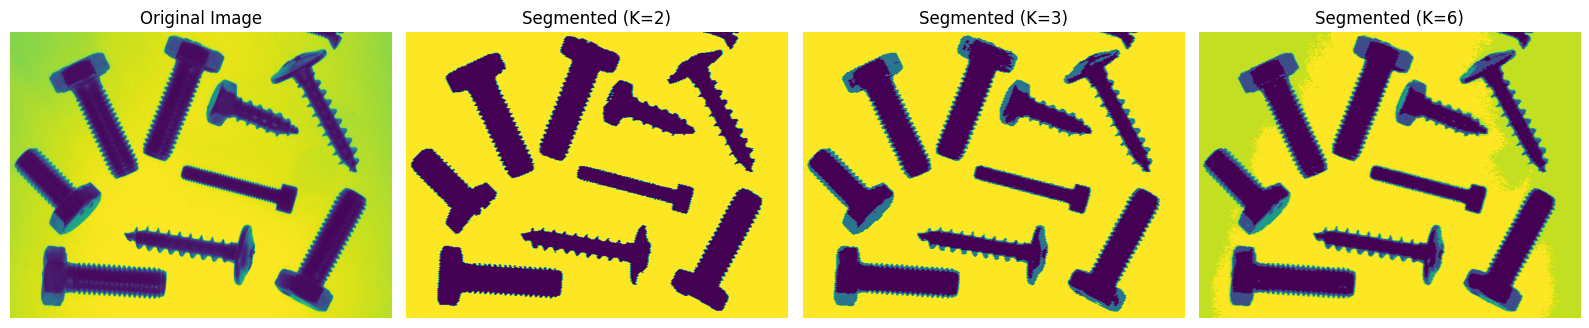

In [4]:
def kmeans_segmentation(image, k):
    # Reshape the image to a 2D array of pixels
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Define stopping criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

    # Perform k-means clustering
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert back to 8-bit values
    centers = np.uint8(centers)

    # Flatten the labels array
    labels = labels.flatten()

    # Convert all pixels to the color of the centroids
    segmented_image = centers[labels.flatten()]

    # Reshape back to the original image dimension
    segmented_image = segmented_image.reshape(image.shape)

    return segmented_image

# Define a list of different cluster values to iterate through
cluster_values = [2, 3, 6]
image  = tiff.imread(img_name_grainsblancs)

# Set up a subplot with the original image and segmented images in a row
plt.figure(figsize=(16, 4))

# Original Image
plt.subplot(1, len(cluster_values) + 1, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

# Iterate through different cluster values and display the segmented images
for i, k in enumerate(cluster_values):
    segmented_image = kmeans_segmentation(image, k)
    plt.subplot(1, len(cluster_values) + 1, i + 2)
    plt.title(f'Segmented (K={k})')
    plt.imshow(segmented_image)
    plt.axis('off')

plt.tight_layout()
plt.show()

# 3.2 Classification

## Haar-like feature detector

- The code visually highlights and identifies faces within the grayscale image by drawing red rectangles around them. 

- This can be used for tasks like face detection and recognition. 

- The accuracy of face detection may vary depending on factors such as the quality of the image and the parameters used in the Haar-like feature detector, such as the scaleFactor, minNeighbors, and minSize.

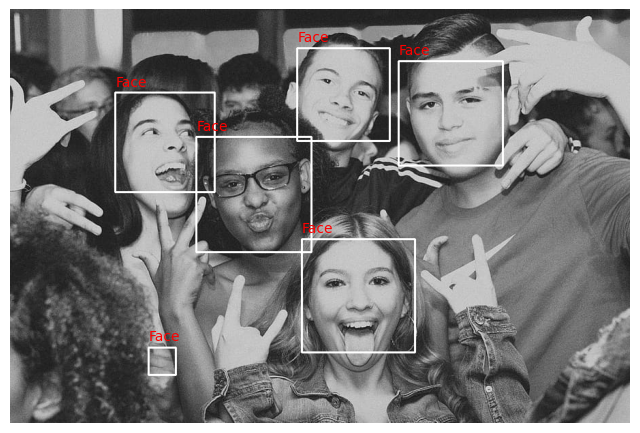

In [5]:
image = cv2.imread(img_name_students, cv2.IMREAD_GRAYSCALE)

# Create a Haar-like feature detector
haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = haar_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Convert the OpenCV image to RGB format for Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(image_rgb, cmap='gray')

# Add rectangles around detected faces
for (x, y, w, h) in faces:
    plt.Rectangle((x, y), w, h, color='red', fill=False, linewidth=2)
    plt.text(x, y - 10, 'Face', color='red')


plt.axis('off')
plt.show()

## Nearest Neighbors

- The scatter plot displays the original data points (blue), a query point (red), and its k nearest neighbors (green circles).
- This visualization helps in understanding which data points are closest to the query point, which can be valuable for various applications such as recommendation systems, anomaly detection, or clustering. 
- The number of neighbors to find (k) can be adjusted to control the level of granularity in identifying the nearest neighbors.

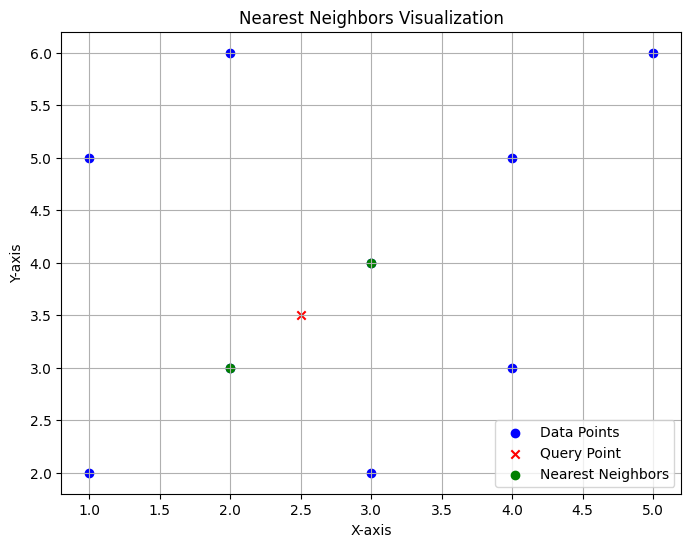

In [6]:
# Sample dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [1, 5], [2, 6], [4, 3], [3, 2]])

k = 2  # Number of neighbors to find
nn = NearestNeighbors(n_neighbors=k)

# Fit the model to dataset
nn.fit(X)

# Define a point for which to find the nearest neighbors
point_to_query = np.array([[2.5, 3.5]])

# Find the k nearest neighbors of the given point
distances, indices = nn.kneighbors(point_to_query)

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Data Points')

# Highlight the query point
plt.scatter(point_to_query[:, 0], point_to_query[:, 1], c='red', marker='x', label='Query Point')

# Highlight the nearest neighbors
nearest_neighbors = X[indices[0]]
plt.scatter(nearest_neighbors[:, 0], nearest_neighbors[:, 1], c='green', marker='o', label='Nearest Neighbors')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Nearest Neighbors Visualization')
plt.legend()

plt.grid(True)
plt.show()

## Logistic Regression

**Binary Classification on Synthetic Dataset with Logistic Regression (Log Loss)**

This analysis involves binary classification on a synthetic dataset with 20 features, utilizing logistic regression with a 'log' loss function.

**Model Performance Metrics**

- **Accuracy**: The overall accuracy of the model is 0.69, indicating that it correctly classifies approximately 69% of the 200 test samples.

**Classification Report:**

- **Precision**:
  - For class 0, precision is 0.63, meaning that among the instances predicted as class 0, 63% are correctly classified.
  - For class 1, precision is 0.75, indicating that 75% of the predicted class 1 instances are correct.

- **Recall**:
  - For class 0, recall is 0.76, indicating that 76% of the actual class 0 instances are correctly identified.
  - For class 1, recall is 0.62, indicating that 62% of the actual class 1 instances are correctly identified.

- **F1-score**: The F1-score, a balanced measure of precision and recall, is 0.69 for class 0 and 0.68 for class 1.

- **Support**: Support values represent the number of samples in each class (0 and 1) in the test dataset.

- **Macro Avg**: The macro average, an unweighted average of precision, recall, and F1-score across both classes, is approximately 0.69.

- **Weighted Avg**: The weighted average considers class imbalances in the dataset and is approximately 0.70, suggesting a slight bias towards the class with more samples (class 1).

**Sample Predictions Table**

The table below displays the true labels and predicted labels for the first 10 instances in the test dataset, providing specific examples of correct and incorrect predictions.

**Summary**

In summary, the model performs reasonably well with an accuracy of 0.69. However, there is potential for improvement, particularly in terms of recall for class 1. The detailed classification report offers insights into the model's strengths and areas that may require refinement.

Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.76      0.69        93
           1       0.75      0.62      0.68       107

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.68       200
weighted avg       0.70      0.69      0.68       200



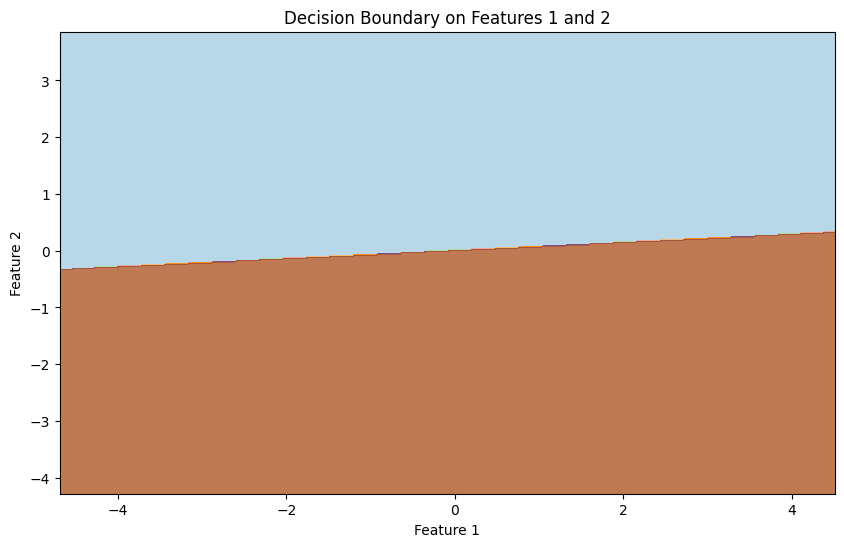

Index,True Label,Predicted Label
0,1,0
1,1,0
2,1,0
3,1,1
4,1,1
5,0,1
6,0,1
7,1,1
8,0,0
9,0,0


In [41]:
# Generate a synthetic dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Select two features for visualization
selected_features = [0, 1]
X_selected = X[:, selected_features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create an instance of LogisticRegression with 'log' loss
clf = LogisticRegression(solver='saga', max_iter=1000, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Plot the decision boundary
def plot_decision_boundary(X, clf, title):
    plt.figure(figsize=(10, 6))
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Plot the decision boundary on the selected two features
plot_decision_boundary(X_selected, clf, 'Decision Boundary on Features 1 and 2')

# Display an interactive HTML table for the first 10 predictions
def display_predictions(predictions, true_labels):
    table_content = "<table><tr><th>Index</th><th>True Label</th><th>Predicted Label</th></tr>"
    for i in range(10):  # Display the first 10 predictions
        table_content += f"<tr><td>{i}</td><td>{true_labels[i]}</td><td>{predictions[i]}</td></tr>"
    table_content += "</table>"
    display(HTML(table_content))

display_predictions(y_pred[:10], y_test[:10])